In [1]:
from util import load_data, create_fixed_size_grid, create_scaling_grid, load_parallel_scaling_data, create_parallel_scaling_grid
all_parallel_scaling_data = load_parallel_scaling_data('./20250508')
all_data = load_data('./20250508')

## Machine Spec

Docker on Ubuntu 22.04 Desktop PC
- 8 vCPUs, 16 threads
- 192 GB RAM
- 1 x NVIDIA RTX 5090
- 32 GB GPU Memory

## Project Overview

|Project|Architecture|Proof System|Continuation|GPU Acceleration|
|-|-|-|-|-|
|SP1 v4.1.2|vRAM-style|FRI-STARK(Plonky3)|o|o|
|RISC Zero v2.0.2|vRAM-style|FRI-STARK|o|o|
|ZKM v1.0.0|vRAM-style|FRI-STARK(Plonky2)|o|x|
|OpenVM #333b3|Modular-style|FRI-STARK(Plonky3)|o|x|
|Jolt #edce5|Modular-style|Lasso Lookup Argument|x|△|
|Nexus v0.3.1|Modular-style|FRI-STARK(Stwo)|o|x|
|Pico|Modular-style|FRI-STARK(Plonky3)|o|x|

- vRAM-style: executes custom circuits defined for each type of instruction like CPU/Memory/Branch in data parallel.
- Modular-style: executes custom circuits defined for each instruction such as add/mul/sw

## E2E Comparison (Prover Time, Verifier Time, Proof Size, Peak Memory)

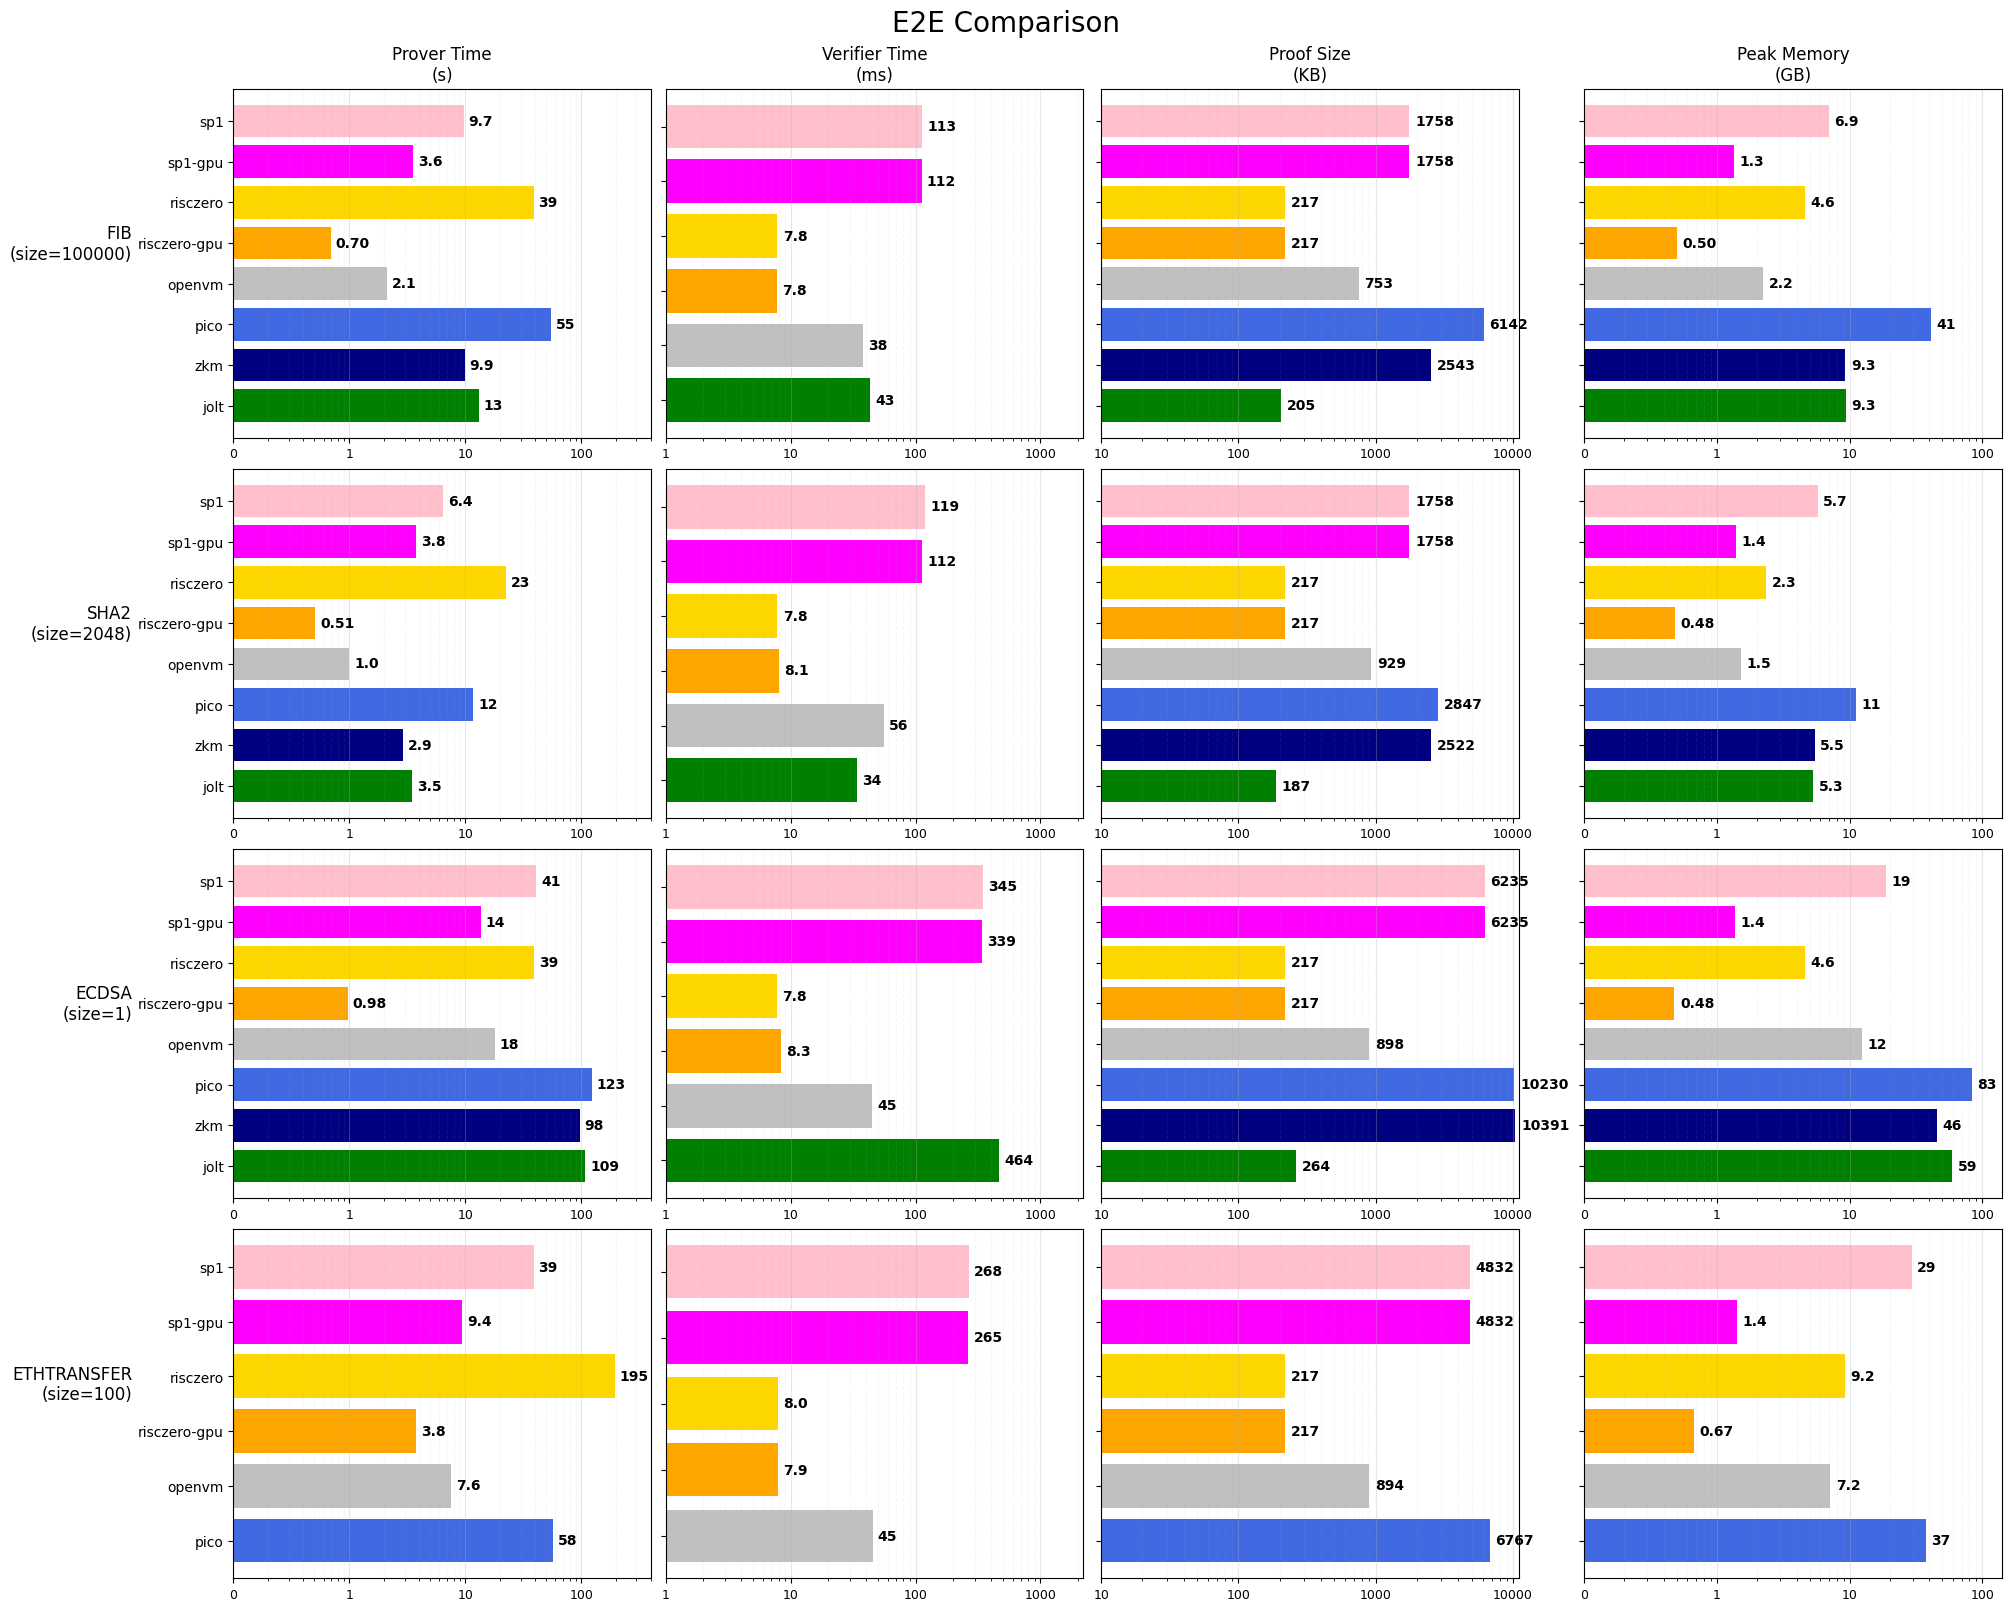

In [2]:
create_fixed_size_grid(all_data)

## Scalability Curve

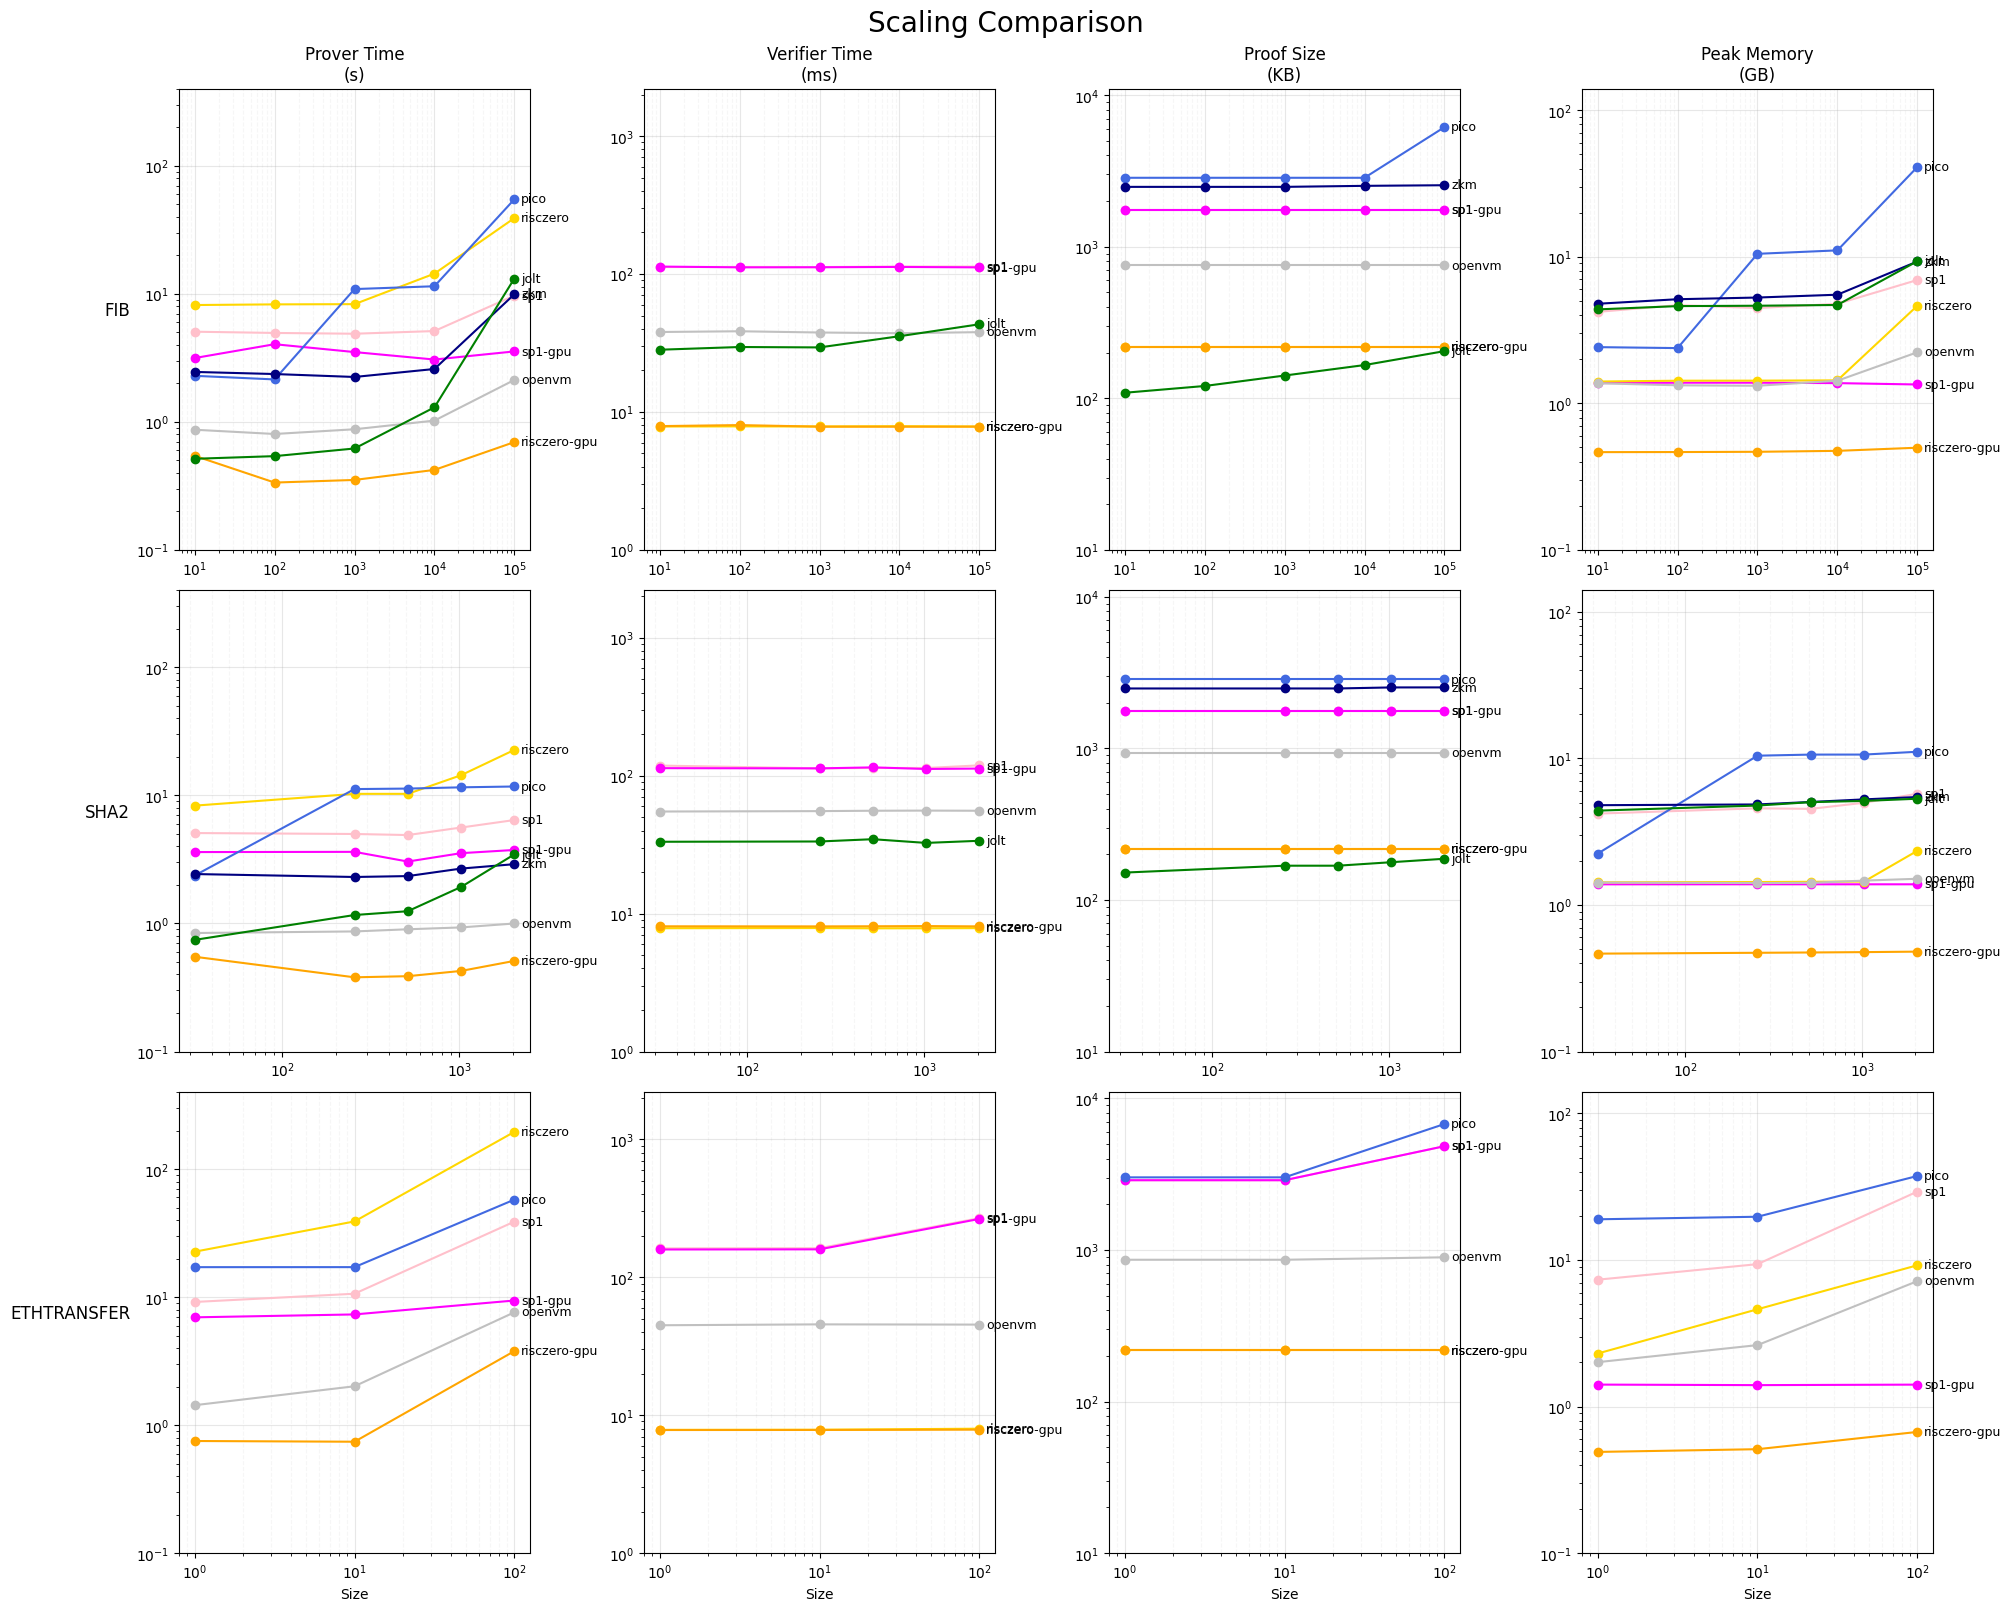

In [3]:
create_scaling_grid(all_data)

## Parallel Performance

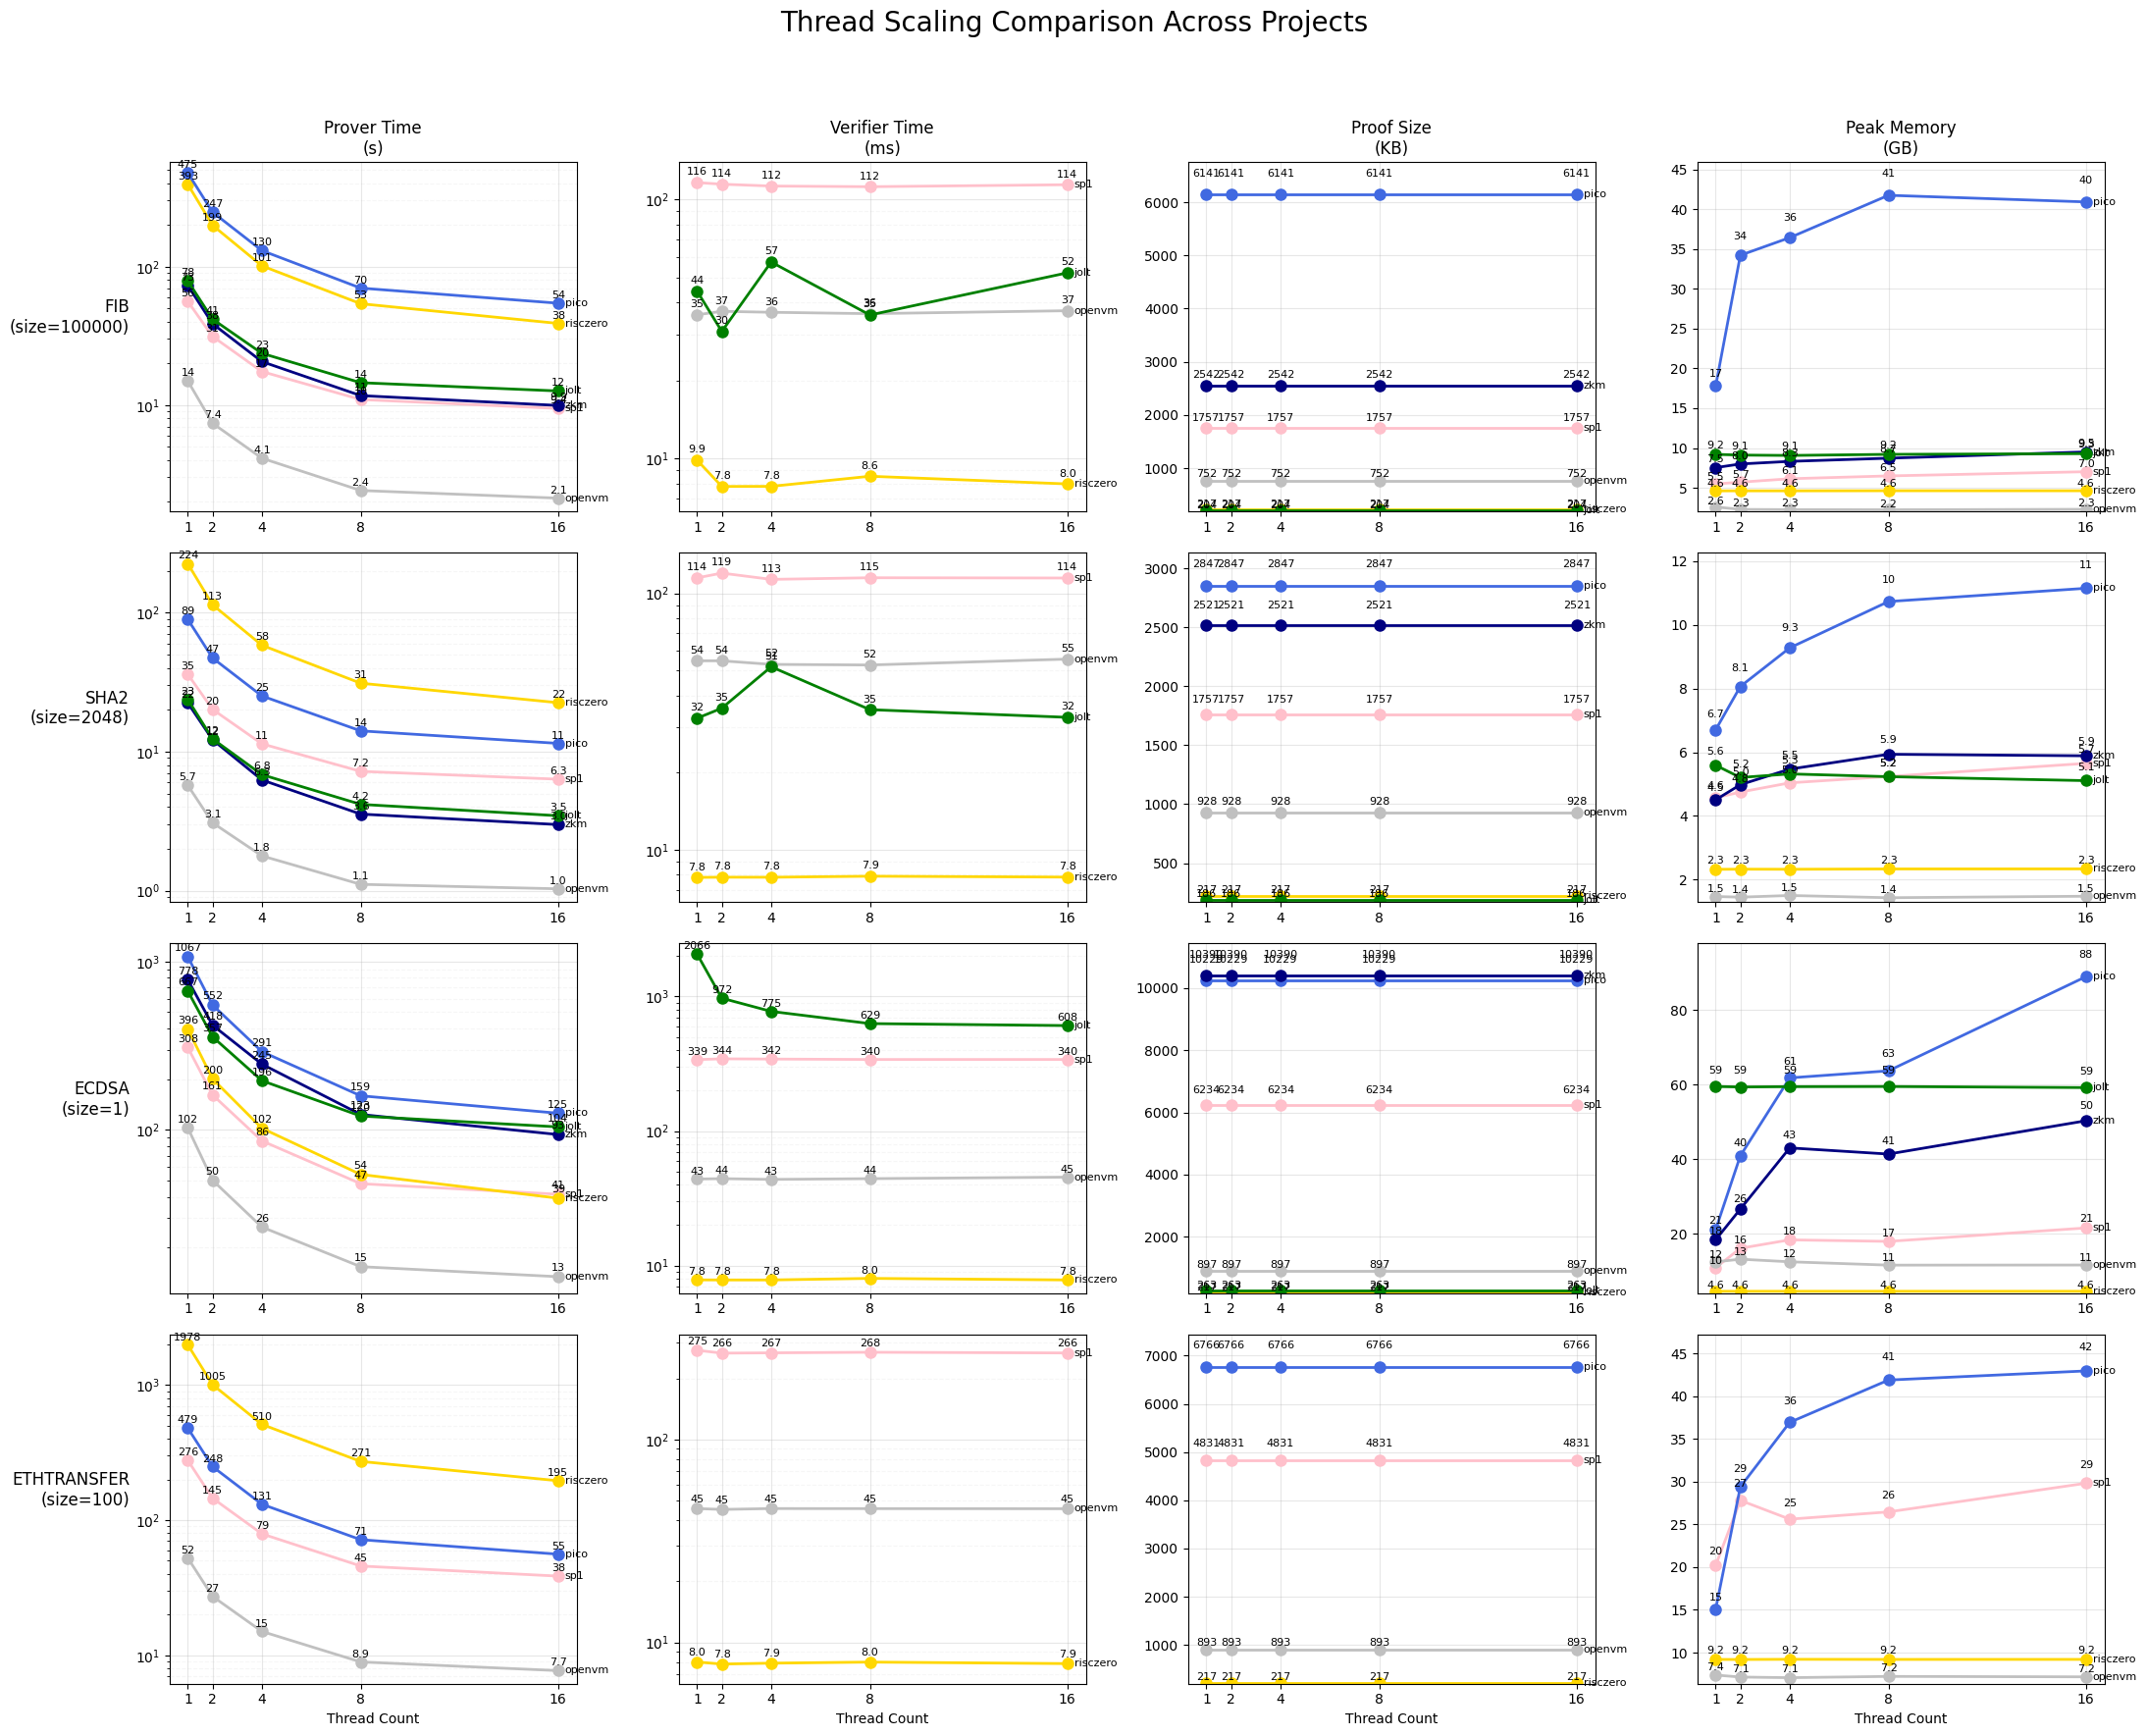

In [3]:
create_parallel_scaling_grid(all_parallel_scaling_data)

## Primitive Call Counts